In [12]:
from simphony_osp.namespaces import city
from simphony_osp.tools import pretty_print
from rdflib import Graph, URIRef, Literal
from rdflib.namespace import FOAF
from simphony_osp.tools import export_file, import_file, search
from simphony_osp.session import core_session
from simphony_osp.ontology import OntologyIndividual


In [3]:

freiburg = city.City(name="Freiburg", coordinates=[47.997791, 7.842609])

neighborhoods = {
    city.Neighborhood(name=name, coordinates=coordinates)
    for name, coordinates in [
        ('Altstadt', [47.99525, 7.84726]),
        ('Stühlinger', [47.99888, 7.83774]),
        ('Neuburg', [48.00021, 7.86084]),
        ('Herdern', [48.00779, 7.86268]),
        ('Brühl', [48.01684, 7.843]),
    ]
}

citizen_1 = city.Citizen(name='Nikola', age=35)
citizen_2 = city.Citizen(name='Lena', age=70)

freiburg[city.hasPart] |= neighborhoods
freiburg[city.hasInhabitant] += citizen_1, citizen_2

In [4]:
freiburg

<OntologyIndividual: 2cf7d72b-9cfd-4f24-8a19-317b8483933a>

In [13]:
from simphony_osp.tools import semantic2dot  # explained in a later section

In [14]:
from simphony_osp.session import Session

session = Session()

In [16]:
list(session)

[<OntologyIndividual: 2cf7d72b-9cfd-4f24-8a19-317b8483933a>]

In [17]:
freiburg


<OntologyIndividual: 2cf7d72b-9cfd-4f24-8a19-317b8483933a>

In [18]:
session.add(citizen_1, citizen_2)

[<OntologyIndividual: 97462f3c-2200-44b1-8c30-75d12628b6ce>,
 <OntologyIndividual: 223ca95f-517e-4f8f-a583-2a4ef0d4b9d8>]

In [19]:
list(session)

[<OntologyIndividual: 2cf7d72b-9cfd-4f24-8a19-317b8483933a>,
 <OntologyIndividual: 97462f3c-2200-44b1-8c30-75d12628b6ce>,
 <OntologyIndividual: 223ca95f-517e-4f8f-a583-2a4ef0d4b9d8>]

In [20]:
neighborhoods


{<OntologyIndividual: 200d6c1b-5845-4d16-8715-dc05d3be82d0>,
 <OntologyIndividual: 947a0d47-49ec-443c-8b69-90df9c7dd147>,
 <OntologyIndividual: 9f30b761-8188-4ce1-b3e1-225bc5542945>,
 <OntologyIndividual: ab54296a-1e75-4e5f-b5dd-6edb90411812>,
 <OntologyIndividual: e411a1d6-ea3f-4e74-87ba-1775cf270e14>}

In [21]:
session.clear()


In [22]:
copies = session.add(freiburg, neighborhoods)

In [23]:
copies



[<OntologyIndividual: 2cf7d72b-9cfd-4f24-8a19-317b8483933a>,
 <OntologyIndividual: 947a0d47-49ec-443c-8b69-90df9c7dd147>,
 <OntologyIndividual: ab54296a-1e75-4e5f-b5dd-6edb90411812>,
 <OntologyIndividual: 200d6c1b-5845-4d16-8715-dc05d3be82d0>,
 <OntologyIndividual: 9f30b761-8188-4ce1-b3e1-225bc5542945>,
 <OntologyIndividual: e411a1d6-ea3f-4e74-87ba-1775cf270e14>]

In [24]:
pretty_print(copies[0])

RuntimeError: Two or more python classes (<class 'simphony_osp.ontology.attribute.OntologyAttribute'>, <class 'simphony_osp.ontology.relationship.OntologyRelationship'>) could be spawned from http://xmlns.com/foaf/0.1/homepage.

In [25]:
for i in session:
    pretty_print(i)

RuntimeError: Two or more python classes (<class 'simphony_osp.ontology.attribute.OntologyAttribute'>, <class 'simphony_osp.ontology.relationship.OntologyRelationship'>) could be spawned from http://xmlns.com/foaf/0.1/homepage.

In [17]:
len(session)

6

In [18]:
str1=""

In [19]:
freiburg.name


'Freiburg'

In [20]:
s=export_file( individuals_or_session=session,main = None,format  = "application/ld+json",    all_triples= True, all_statements= True)

In [21]:
print(s)

[
  {
    "@id": "https://www.simphony-osp.eu/entity#71253f0a-9ba5-4c83-8b69-d347c30d5a5b",
    "@type": [
      "https://www.simphony-osp.eu/city#Neighborhood"
    ],
    "https://www.simphony-osp.eu/city#coordinates": [
      {
        "@type": "https://www.simphony-osp.eu/types#Vector",
        "@value": "13YFp0RR93>yVq_1^`Gv#9Dj`fN>u{"
      }
    ],
    "https://www.simphony-osp.eu/city#name": [
      {
        "@value": "Neuburg"
      }
    ]
  },
  {
    "@id": "https://www.simphony-osp.eu/entity#259ba6a5-4ce6-4494-a038-cea7b870e376",
    "@type": [
      "https://www.simphony-osp.eu/city#Neighborhood"
    ],
    "https://www.simphony-osp.eu/city#coordinates": [
      {
        "@type": "https://www.simphony-osp.eu/types#Vector",
        "@value": "13YFp0RR93FrGm}{{TopGpEa9Vsjrr"
      }
    ],
    "https://www.simphony-osp.eu/city#name": [
      {
        "@value": "Herdern"
      }
    ]
  },
  {
    "@id": "https://www.simphony-osp.eu/entity#6b46a972-7227-40af-9d2a-b97fd176e

In [22]:
list(core_session)

[<OntologyIndividual: 6b46a972-7227-40af-9d2a-b97fd176ee7a>,
 <OntologyIndividual: d313ade1-0c28-40bb-852a-8ce843ea3c5b>,
 <OntologyIndividual: 1d6fd8ad-b3ae-406e-897d-ebacd07044e9>,
 <OntologyIndividual: 71253f0a-9ba5-4c83-8b69-d347c30d5a5b>,
 <OntologyIndividual: 259ba6a5-4ce6-4494-a038-cea7b870e376>,
 <OntologyIndividual: ab80de8e-a283-4af3-b7e1-7da11d5a7228>,
 <OntologyIndividual: 692210ed-9fb1-4310-9a06-fbe3e2ec0a5c>,
 <OntologyIndividual: 4d7abafe-8f29-43a0-80cf-0a69d110158d>]

In [23]:
core_session.get(citizen_1 )

<OntologyIndividual: 692210ed-9fb1-4310-9a06-fbe3e2ec0a5c>

In [24]:
from simphony_osp.namespaces import city, owl, rdfs
from simphony_osp.session import core_session

# Create a city called "Freiburg"
freiburg = city.City(name="Freiburg", coordinates=[47.997791, 7.842609])
freiburg_neighborhoods = [
    city.Neighborhood(name=name, coordinates=coordinates)
    for name, coordinates in [
        ('Altstadt', [47.99525, 7.84726]),
        ('Stühlinger', [47.99888, 7.83774]),
        ('Neuburg', [48.00021, 7.86084]),
        ('Herdern', [48.00779, 7.86268]),
        ('Brühl', [48.01684, 7.843]),
    ]
]
freiburg_citizens = {
    city.Citizen(name='Nikola', age=35,
                 iri="http://example.org/entities#Nikola"),
    city.Citizen(name='Lena', age=70,
                 iri="http://example.org/entities#Lena"),
}
freiburg[city.hasPart] |= freiburg_neighborhoods
freiburg[city.hasInhabitant] |= freiburg_citizens

# Create a city called "Paris"
paris = city.City(name="Paris", coordinates=[48.85333, 2.34885])
paris_neighborhoods = {
    city.Neighborhood(name=name, coordinates=coordinates)
    for name, coordinates in [
        ('Louvre', [48.86466, 2.33487]),
        ('Bourse', [48.86864, 2.34146]),
        ('Temple', [48.86101, 2.36037]),
        ('Hôtel-de-Ville', [48.85447, 2.35902]),
        ('Panthéon', [48.84466, 2.3471]),
    ]
}
paris_citizens = {
    city.Citizen(name='François', age=32)
}
paris[city.hasPart] |= paris_neighborhoods
paris[city.hasInhabitant] = paris_citizens

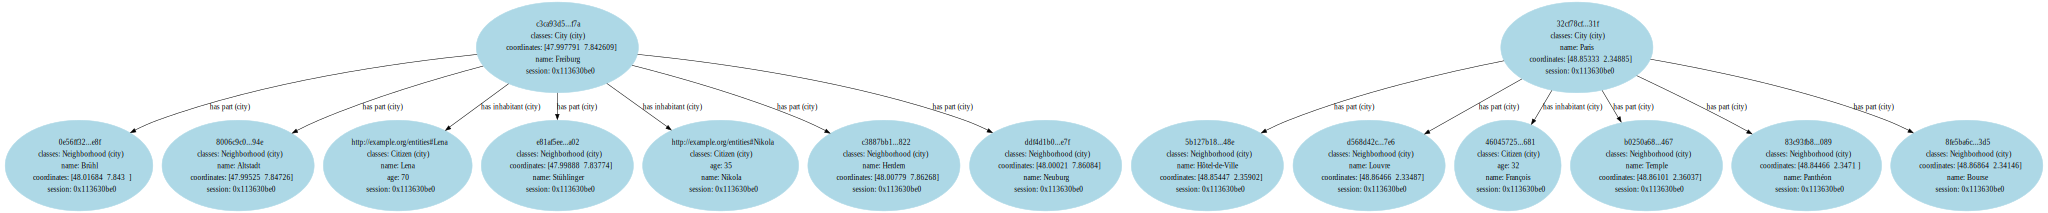

In [25]:
semantic2dot(freiburg, *freiburg_neighborhoods, *freiburg_citizens,
             paris, *paris_neighborhoods, *paris_citizens)

In [26]:

found = list(
    search.find(freiburg)
)

In [27]:
found


[<OntologyIndividual: c3ca93d5-3fd2-4bbc-bc2c-994a69553f7a>,
 <OntologyIndividual: 0e56ff32-7d95-4690-8424-d2f60bdb8e8f>,
 <OntologyIndividual: 8006c9c0-6fb2-4074-85a8-4dae2484894e>,
 <OntologyIndividual: http://example.org/entities#Lena>,
 <OntologyIndividual: http://example.org/entities#Nikola>,
 <OntologyIndividual: c3887bb1-1490-4b38-9610-f95cfa4ed822>,
 <OntologyIndividual: ddf4d1b0-2d56-4bec-9810-c8c57059ce7f>,
 <OntologyIndividual: e81af5ee-3f22-4a2c-87b9-06d406e90a02>]

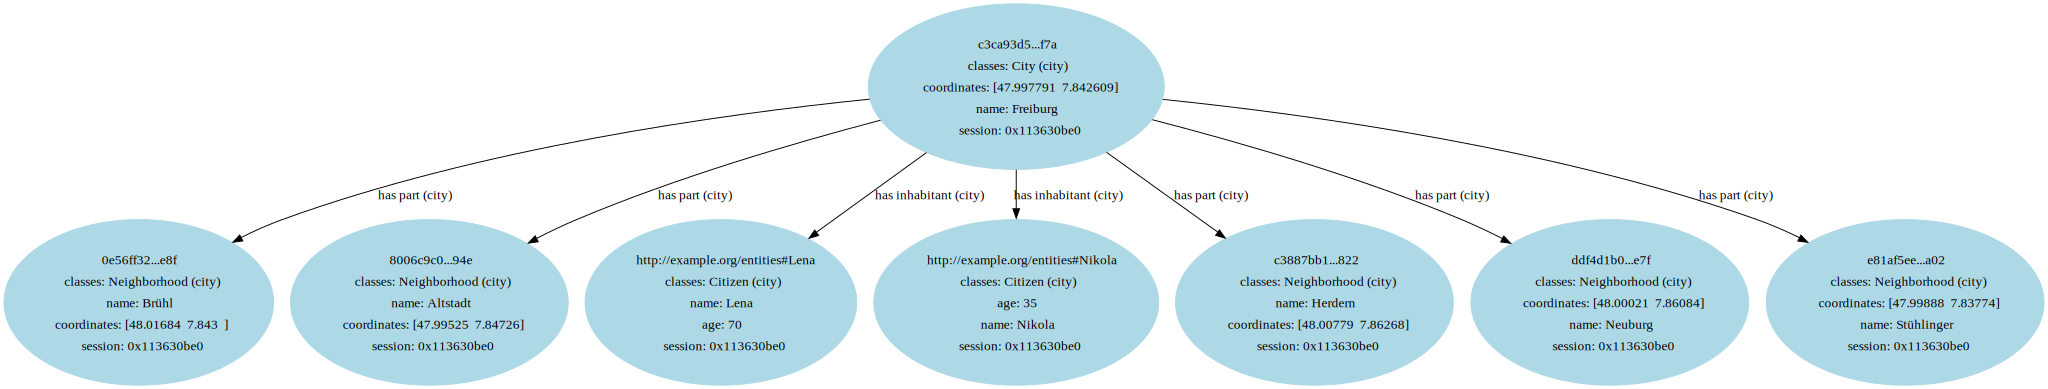

In [28]:
semantic2dot(*found)

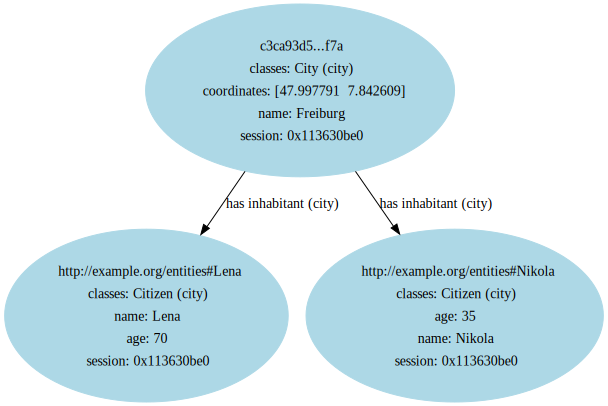

In [29]:
found = list(
    search.find(
        freiburg,
        rel=(city.hasInhabitant, city.hasWorker)  # if only one relationship has to be considered, just pass it directly (i.e. `rel=city.hasInhabitant`)
    )
)

semantic2dot(*found)

In [30]:
s=export_file( individuals_or_session=found,main = None,format  = "application/ld+json",    all_triples= True, all_statements= True)

In [31]:
print(s)    

[
  {
    "@id": "https://www.simphony-osp.eu/entity#c3ca93d5-3fd2-4bbc-bc2c-994a69553f7a",
    "@type": [
      "https://www.simphony-osp.eu/city#City"
    ],
    "https://www.simphony-osp.eu/city#coordinates": [
      {
        "@type": "https://www.simphony-osp.eu/types#Vector",
        "@value": "13YFp0RR93AD@t&xBo{#)k4YS)LtJz"
      }
    ],
    "https://www.simphony-osp.eu/city#hasInhabitant": [
      {
        "@id": "http://example.org/entities#Nikola"
      },
      {
        "@id": "http://example.org/entities#Lena"
      }
    ],
    "https://www.simphony-osp.eu/city#hasPart": [
      {
        "@id": "https://www.simphony-osp.eu/entity#ddf4d1b0-2d56-4bec-9810-c8c57059ce7f"
      },
      {
        "@id": "https://www.simphony-osp.eu/entity#c3887bb1-1490-4b38-9610-f95cfa4ed822"
      },
      {
        "@id": "https://www.simphony-osp.eu/entity#e81af5ee-3f22-4a2c-87b9-06d406e90a02"
      },
      {
        "@id": "https://www.simphony-osp.eu/entity#0e56ff32-7d95-4690-8424-d2

In [32]:
result = search.sparql(  # no session specified, uses the default session (Core Session in this example)
    f"""SELECT ?o WHERE {{
        <{freiburg.identifier}> ?p ?o .
    }}
    """
)

print(
    len(result),  # number of rows in the result
    bool(result)  # True when at least one match has been found
)

for row in result:  # iterating the result yields ResultRow objects
    print(row.__repr__())
    # ResultRows inherint from tuples
    # the order of the variables passed to the query is respected

    print(row[0].__repr__())  # a specific variable can be accessed using either its position,
    print(row['o'].__repr__())  # or name

    print(row.get('unknown_variable', None))  # a dict-like `get` method is available

    print(row.asdict())  # transforms the row into a dictionary

10 True
(rdflib.term.Literal('13YFp0RR93AD@t&xBo{#)k4YS)LtJz', datatype=rdflib.term.URIRef('https://www.simphony-osp.eu/types#Vector')),)
rdflib.term.Literal('13YFp0RR93AD@t&xBo{#)k4YS)LtJz', datatype=rdflib.term.URIRef('https://www.simphony-osp.eu/types#Vector'))
rdflib.term.Literal('13YFp0RR93AD@t&xBo{#)k4YS)LtJz', datatype=rdflib.term.URIRef('https://www.simphony-osp.eu/types#Vector'))
None
{'o': rdflib.term.Literal('13YFp0RR93AD@t&xBo{#)k4YS)LtJz', datatype=rdflib.term.URIRef('https://www.simphony-osp.eu/types#Vector'))}
(rdflib.term.Literal('Freiburg', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)
rdflib.term.Literal('Freiburg', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string'))
rdflib.term.Literal('Freiburg', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string'))
None
{'o': rdflib.term.Literal('Freiburg', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string'))}
(rdflib.term.URIRef('https://www.simph

In [33]:
for i in session:
    pretty_print(i)

- Ontology individual:
  identifier: 6b46a972-7227-40af-9d2a-b97fd176ee7a
  type: City (city)
  superclasses: None (owl), Geographical Place (city), City (city), Populated Place (city)
  values:  coordinates: [47.997791  7.842609]
           name: Freiburg
   |_Relationship has part (city):
     - Ontology individual of class Neighborhood
      . identifier: 1d6fd8ad-b3ae-406e-897d-ebacd07044e9
      .  coordinates: [47.99888  7.83774]
      .  name: Stühlinger
     - Ontology individual of class Neighborhood
      . identifier: 259ba6a5-4ce6-4494-a038-cea7b870e376
      .  coordinates: [48.00779  7.86268]
      .  name: Herdern
     - Ontology individual of class Neighborhood
      . identifier: 71253f0a-9ba5-4c83-8b69-d347c30d5a5b
      .  coordinates: [48.00021  7.86084]
      .  name: Neuburg
     - Ontology individual of class Neighborhood
      . identifier: ab80de8e-a283-4af3-b7e1-7da11d5a7228
      .  coordinates: [48.01684  7.843  ]
      .  name: Brühl
     - Ontology individ

In [34]:
city.Citizen.identifier

rdflib.term.URIRef('https://www.simphony-osp.eu/city#Citizen')

In [35]:
city['Floor'].is_subclass_of

<bound method OntologyEntity.is_subclass_of of <OntologyClass: Floor https://www.simphony-osp.eu/city#Floor>>

In [36]:
result = search.sparql(
    f"""SELECT ?person ?name ?age WHERE {{
        ?person rdf:type/rdfs:subClassOf <{city.Person.identifier}> .
        ?person <{city['name'].identifier}> ?name .
        ?person <{city.age.identifier}> ?age .
    }}
    """,
    ontology=False
)

print("Query without ontology:", len(result), "results")

result = search.sparql(
    f"""SELECT ?person ?name ?age WHERE {{
        ?person rdf:type <{city.Citizen.identifier}> .
        ?person <{city['name'].identifier}> ?name .
        ?person <{city.age.identifier}> ?age .
    }}
    """,
    ontology=True
)

print("Query with ontology:", len(result), "results")

for row in result(person=OntologyIndividual, name=str, age=int):
    print(row)

Query without ontology: 0 results
Query with ontology: 5 results
(<OntologyIndividual: 692210ed-9fb1-4310-9a06-fbe3e2ec0a5c>, 'Nikola', 35)
(<OntologyIndividual: 4d7abafe-8f29-43a0-80cf-0a69d110158d>, 'Lena', 70)
(<OntologyIndividual: http://example.org/entities#Nikola>, 'Nikola', 35)
(<OntologyIndividual: http://example.org/entities#Lena>, 'Lena', 70)
(<OntologyIndividual: 46045725-dc27-4dd6-861a-bab002167681>, 'François', 32)


In [37]:
export_file(core_session, file='./dome-core-data-session.ttl', format='turtle')

In [38]:
pwd()

'/Users/adham/dev/simphony_4_git/simphony-osp'

In [39]:
a=boe.Atom()

In [40]:
m=boe.Mass()